# Myers Brigss ML Project: Neural Net Model

### Imports & Dependencies

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import os 
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from scipy.sparse import csr_matrix 
from tensorflow.keras.constraints import max_norm

In [2]:
# import the cleaned df
cleaned_df = pd.read_csv('../../Resources/data/cleaned_mbti.csv', index_col=0)
cleaned_df.head()

,type,posts,http_count,no_url,text
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,24,' and intj moments sportscenter not top ten...,and intj moments sportscenter not top ten p...
1,ENTP,'I'm finding the lack of me in these posts ver...,10,'I'm finding the lack of me in these posts ver...,i m finding the lack of me in these posts very...
2,INTP,'Good one _____ https://www.youtube.com/wat...,5,"'Good one _____ course, to which I say I k...",good one course to which i say i kn...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",2,"'Dear INTP, I enjoyed our conversation the o...",dear intp i enjoyed our conversation the ot...
4,ENTJ,'You're fired.|||That's another silly misconce...,6,'You're fired.|||That's another silly misconce...,you re fired that s another silly misconcepti...


### TFIDF Vectorizer

In [3]:
vectorizer = TfidfVectorizer(
    max_features=17000,
    min_df=7,
    max_df=0.8,
    stop_words="english",
    ngram_range=(1,3),
)
X = cleaned_df["text"].values
y = cleaned_df["type"].values
label_encoder = LabelEncoder()
label_encoder.fit(y)
y = label_encoder.transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
X_train = csr_matrix.toarray(X_train)
X_test = csr_matrix.toarray(X_test)

In [4]:
# Encode
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

### Model

In [5]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
# Define the model - deep neural net
number_input_features = 17000
hidden_nodes_layer1 =  24
hidden_nodes_layer2 = 12

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features,
                          kernel_constraint=max_norm(3), bias_constraint=max_norm(3), activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2,
                             kernel_constraint=max_norm(3), bias_constraint=max_norm(3), activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=16, activation="softmax"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

# Train the model
fit_model = nn.fit(X_train, y_train_categorical, callbacks = [es, mc], validation_split=0.33, epochs=100, batch_size=10)

# Evaluate the model using the test data
_, train_acc = fit_model(X_train, y_train_categorical, verbose=0)
_, test_acc = fit_model(X_test, y_test_categorical, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train on 4359 samples, validate on 2147 samples
Epoch 1/100
4300/4359 [============================>.] - ETA: 0s - loss: 2.3398 - accuracy: 0.2200
Epoch 00001: val_accuracy improved from -inf to 0.32278, saving model to best_model.h5
4359/4359 [==============================] - 7s 2ms/sample - loss: 2.3388 - accuracy: 0.2205 - val_loss: 2.2066 - val_accuracy: 0.3228
Epoch 2/100
4310/4359 [============================>.] - ETA: 0s - loss: 2.0388 - accuracy: 0.3817
Epoch 00002: val_accuracy improved from 0.32278 to 0.33768, saving model to best_model.h5
4359/4359 [==============================] - 4s 993us/sample - loss: 2.0370 - accuracy: 0.3820 - val_loss: 2.0516 - val_accuracy: 0.3377
Epoch 3/100
4310/4359 [============================>.] - ETA: 0s - loss: 1.7630 - accuracy: 0.4821
Epoch 00003: val_accuracy improved from 0.33768 to 0.39264, saving model to best_model.h5
4359/4359 [==============================] - 4s 959us/sample - loss: 1.7626 - accuracy: 0.4820 - val_loss: 1.8608 - 

Epoch 29/100
4340/4359 [============================>.] - ETA: 0s - loss: 0.4269 - accuracy: 0.9113
Epoch 00029: val_accuracy did not improve from 0.49930
4359/4359 [==============================] - 4s 971us/sample - loss: 0.4272 - accuracy: 0.9112 - val_loss: 1.7645 - val_accuracy: 0.4769
Epoch 30/100
4300/4359 [============================>.] - ETA: 0s - loss: 0.3985 - accuracy: 0.9205
Epoch 00030: val_accuracy did not improve from 0.49930
4359/4359 [==============================] - 4s 988us/sample - loss: 0.3998 - accuracy: 0.9202 - val_loss: 1.7813 - val_accuracy: 0.4741
Epoch 31/100
4310/4359 [============================>.] - ETA: 0s - loss: 0.3948 - accuracy: 0.9183
Epoch 00031: val_accuracy did not improve from 0.49930
4359/4359 [==============================] - 4s 967us/sample - loss: 0.3979 - accuracy: 0.9172 - val_loss: 1.7578 - val_accuracy: 0.4839
Epoch 32/100
4350/4359 [============================>.] - ETA: 0s - loss: 0.4284 - accuracy: 0.9133
Epoch 00032: val_accurac

Epoch 57/100
4310/4359 [============================>.] - ETA: 0s - loss: 0.0988 - accuracy: 0.9810
Epoch 00057: val_accuracy did not improve from 0.51653
4359/4359 [==============================] - 4s 970us/sample - loss: 0.0982 - accuracy: 0.9812 - val_loss: 1.8051 - val_accuracy: 0.5086
Epoch 58/100
4310/4359 [============================>.] - ETA: 0s - loss: 0.0970 - accuracy: 0.9824
Epoch 00058: val_accuracy did not improve from 0.51653
4359/4359 [==============================] - 4s 963us/sample - loss: 0.0971 - accuracy: 0.9826 - val_loss: 1.8444 - val_accuracy: 0.5072
Epoch 59/100
4300/4359 [============================>.] - ETA: 0s - loss: 0.1238 - accuracy: 0.9819
Epoch 00059: val_accuracy did not improve from 0.51653
4359/4359 [==============================] - 4s 959us/sample - loss: 0.1241 - accuracy: 0.9819 - val_loss: 1.8488 - val_accuracy: 0.5133
Epoch 60/100
4300/4359 [============================>.] - ETA: 0s - loss: 0.3236 - accuracy: 0.9293
Epoch 00060: val_accurac

TypeError: 'History' object is not callable

In [10]:
# summarize history for accuracy
print(fit_model.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


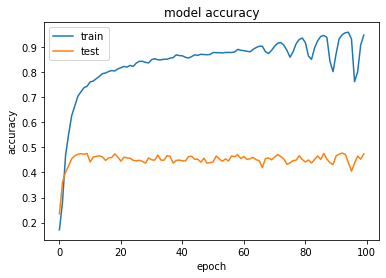

In [15]:
import matplotlib
import matplotlib.pyplot as plt
# summarize model accuracy
plt.plot(fit_model.history['accuracy'])
plt.plot(fit_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

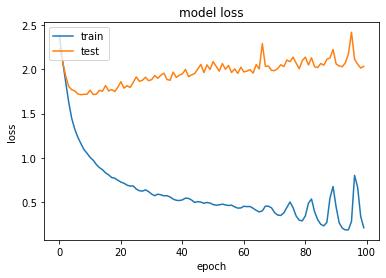

In [16]:
# summarize history for loss
plt.plot(fit_model.history['loss'])
plt.plot(fit_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()